In [106]:
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [107]:
import numpy as np

In [108]:
file_name = "data_2023_prefudi.csv"

# Read the CSV, specifying the separator and skipping bad lines
df = pd.read_csv(
    file_name,
    sep=';',
    encoding='latin-1',
    on_bad_lines='skip'
)

print("File loaded successfully. First 5 rows:")
print(df.head())


File loaded successfully. First 5 rows:
   ANOEMPENHO           DTLANCAMENTO  EMPENHO    FONTE  \
0        2023  2023-01-16 00:00:00.0     1000  1500000   
1        2023  2023-02-28 10:03:18.0    10002  1552000   
2        2023  2023-02-28 10:03:18.0    10004  1500000   
3        2023  2023-02-28 10:03:18.0    10007  1500000   
4        2023  2023-02-28 10:03:18.0    10008  1500000   

                                          FORNECEDOR  \
0                           CECILIA RIBEIRO ROCHA      
1  VASCONCELOS INDUSTRIA COMERCIO IMPORTACAO E EX...   
2        WELLINGTON DE SOUZA VASCONCELOS 04788493110   
3        WELLINGTON DE SOUZA VASCONCELOS 04788493110   
4           MMH MED COMERCIO DE PRODUTOS HOSPITALARE   

         FUNCIONALPROGRAMATICA LICITACAO                           NOMEORGAO  \
0  12 365 2002 999 2301 319092       NaN  PREFEITURA MUNICIPAL DE UBERLÂNDIA   
1  12 361 2004 999 2076 339030  545/2022  PREFEITURA MUNICIPAL DE UBERLÂNDIA   
2  12 361 2001 999 2554 339030  54

In [109]:
df.loc[0]

ANOEMPENHO                                             2023
DTLANCAMENTO                          2023-01-16 00:00:00.0
EMPENHO                                                1000
FONTE                                               1500000
FORNECEDOR                         CECILIA RIBEIRO ROCHA   
FUNCIONALPROGRAMATICA           12 365 2002 999 2301 319092
LICITACAO                                               NaN
NOMEORGAO                PREFEITURA MUNICIPAL DE UBERLÂNDIA
OBJETOSERVICO                                           NaN
SECRETARIA                 SECRETARIA MUNICIPAL DE EDUCAÇÃO
VALORANULADO                                         R$ 0,0
VALOREMPENHADO                                  R$ 1.346,66
VALORLIQUIDADO                                  R$ 1.346,66
VALORPAGO                                       R$ 1.346,66
VALORRETORNADO                                       R$ 0,0
Name: 0, dtype: object

In [110]:
print("DataFrame info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27529 entries, 0 to 27528
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANOEMPENHO             27529 non-null  int64 
 1   DTLANCAMENTO           27529 non-null  object
 2   EMPENHO                27529 non-null  int64 
 3   FONTE                  27529 non-null  int64 
 4   FORNECEDOR             27529 non-null  object
 5   FUNCIONALPROGRAMATICA  27529 non-null  object
 6   LICITACAO              18814 non-null  object
 7   NOMEORGAO              27529 non-null  object
 8   OBJETOSERVICO          19114 non-null  object
 9   SECRETARIA             27529 non-null  object
 10  VALORANULADO           27529 non-null  object
 11  VALOREMPENHADO         27529 non-null  object
 12  VALORLIQUIDADO         27529 non-null  object
 13  VALORPAGO              27529 non-null  object
 14  VALORRETORNADO         27529 non-null  object
dtypes: int64(3), object

In [111]:
print(df['SECRETARIA'].unique())

['SECRETARIA MUNICIPAL DE EDUCAÇÃO' 'SECRETARIA MUNICIPAL DE SAÚDE'
 'SECRETARIA MUN DE DESENVOLVIMENTO SOCIAL'
 'SECRETARIA MUNICIPAL DE TRÂNSITO E TRANSPORTES'
 'SECRETARIA MUN DE AGRONEGÓCIO, ECONOMIA E INOVAÇÃO'
 'SECRETARIA MUNICIPAL DE OBRAS' 'SECRETARIA MUNICIPAL DE FINANÇAS'
 'PROCURADORIA GERAL DO MUNICIPIO'
 'SECRETARIA MUNICIPAL DE CULTURA E TURISMO'
 'SECRETARIA MUNICIPAL DE ADMINISTRAÇÃO'
 'SECRETARIA MUNICIPAL DE SEGURANÇA INTEGRADA'
 'SECRETARIA MUN DE MEIO AMBIENTE E SUSTENTABILIDADE'
 'SECRETARIA MUNICIPAL DE PLANEJAMENTO URBANO'
 'SECRETARIA MUNICIPAL DE GOVERNO E COMUNICAÇÃO'
 'SECRETARIA MUNICIPAL DE GESTÃO ESTRATÉGICA'
 'SECRETARIA MUNICIPAL DE SERVIÇOS URBANOS'
 'CONTROLADORIA-GERAL DO MUNICÍPIO' 'SECRETARIA MUNICIPAL DA JUVENTUDE'
 'SECRETARIA MUNICIPAL DE HABITAÇÃO']


In [112]:
df_educacao = df[df['SECRETARIA'] == 'SECRETARIA MUNICIPAL DE EDUCAÇÃO']
print(f"Dataframe para secretária da edução com {len(df_educacao)} linhas")

Dataframe para secretária da edução com 9323 linhas


In [113]:
print("DataFrame info:", df_educacao.info(), df_educacao.head(), sep="\n")

<class 'pandas.core.frame.DataFrame'>
Index: 9323 entries, 0 to 27528
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANOEMPENHO             9323 non-null   int64 
 1   DTLANCAMENTO           9323 non-null   object
 2   EMPENHO                9323 non-null   int64 
 3   FONTE                  9323 non-null   int64 
 4   FORNECEDOR             9323 non-null   object
 5   FUNCIONALPROGRAMATICA  9323 non-null   object
 6   LICITACAO              4961 non-null   object
 7   NOMEORGAO              9323 non-null   object
 8   OBJETOSERVICO          4996 non-null   object
 9   SECRETARIA             9323 non-null   object
 10  VALORANULADO           9323 non-null   object
 11  VALOREMPENHADO         9323 non-null   object
 12  VALORLIQUIDADO         9323 non-null   object
 13  VALORPAGO              9323 non-null   object
 14  VALORRETORNADO         9323 non-null   object
dtypes: int64(3), object(12)
m

In [114]:
df_educacao['DTLANCAMENTO'] = pd.to_datetime(df_educacao['DTLANCAMENTO'])

In [115]:
df_educacao['DATA_LANCAMENTO'] = df_educacao['DTLANCAMENTO'].dt.date
df_educacao['HORA_LANCAMENTO'] = df_educacao['DTLANCAMENTO'].dt.time

In [116]:
df_educacao.groupby('DATA_LANCAMENTO').count().reset_index().sort_values(by='DTLANCAMENTO', ascending=False)

,DATA_LANCAMENTO,ANOEMPENHO,DTLANCAMENTO,EMPENHO,FONTE,FORNECEDOR,FUNCIONALPROGRAMATICA,LICITACAO,NOMEORGAO,OBJETOSERVICO,SECRETARIA,VALORANULADO,VALOREMPENHADO,VALORLIQUIDADO,VALORPAGO,VALORRETORNADO,HORA_LANCAMENTO
3,2023-01-16,1206,1206,1206,1206,1206,1206,5,1206,5,1206,1206,1206,1206,1206,1206,1206
14,2023-01-31,622,622,622,622,622,622,121,622,121,622,622,622,622,622,622,622
185,2023-10-31,313,313,313,313,313,313,292,313,292,313,313,313,313,313,313,313
16,2023-02-02,302,302,302,302,302,302,290,302,294,302,302,302,302,302,302,302
6,2023-01-19,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2023-07-06,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
181,2023-10-25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
201,2023-11-27,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
210,2023-12-12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [117]:
df_educacao.head()

,ANOEMPENHO,DTLANCAMENTO,EMPENHO,FONTE,FORNECEDOR,FUNCIONALPROGRAMATICA,LICITACAO,NOMEORGAO,OBJETOSERVICO,SECRETARIA,VALORANULADO,VALOREMPENHADO,VALORLIQUIDADO,VALORPAGO,VALORRETORNADO,DATA_LANCAMENTO,HORA_LANCAMENTO
0,2023,2023-01-16 00:00:00,1000,1500000,CECILIA RIBEIRO ROCHA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0","R$ 1.346,66","R$ 1.346,66","R$ 1.346,66","R$ 0,0",2023-01-16,00:00:00
1,2023,2023-02-28 10:03:18,10002,1552000,VASCONCELOS INDUSTRIA COMERCIO IMPORTACAO E EX...,12 361 2004 999 2076 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,BOLACHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0","R$ 23.500,0","R$ 23.500,0","R$ 23.500,0","R$ 0,0",2023-02-28,10:03:18
2,2023,2023-02-28 10:03:18,10004,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 361 2001 999 2554 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0","R$ 13.430,0","R$ 13.430,0","R$ 13.430,0","R$ 0,0",2023-02-28,10:03:18
3,2023,2023-02-28 10:03:18,10007,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 365 2002 999 2555 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0","R$ 12.640,0","R$ 12.640,0","R$ 12.640,0","R$ 0,0",2023-02-28,10:03:18
8,2023,2023-01-16 00:00:00,1001,1500000,CLAUDIA LUCIA DE ANDRADE ALCANTARA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0","R$ 1.734,92","R$ 1.734,92","R$ 1.734,92","R$ 0,0",2023-01-16,00:00:00


In [118]:
df_educacao_trat = df_educacao.copy()
column_mapping_convert_float = [
    'VALOREMPENHADO',
    'VALORLIQUIDADO',
    'VALORPAGO'
]
for col in column_mapping_convert_float:
    df_educacao_trat[col] = (
        df_educacao_trat[col]
        .str.replace('R$', '', regex=False)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
        .str.strip()
        .astype(float)
    )
        



df_educacao_trat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9323 entries, 0 to 27528
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ANOEMPENHO             9323 non-null   int64         
 1   DTLANCAMENTO           9323 non-null   datetime64[ns]
 2   EMPENHO                9323 non-null   int64         
 3   FONTE                  9323 non-null   int64         
 4   FORNECEDOR             9323 non-null   object        
 5   FUNCIONALPROGRAMATICA  9323 non-null   object        
 6   LICITACAO              4961 non-null   object        
 7   NOMEORGAO              9323 non-null   object        
 8   OBJETOSERVICO          4996 non-null   object        
 9   SECRETARIA             9323 non-null   object        
 10  VALORANULADO           9323 non-null   object        
 11  VALOREMPENHADO         9323 non-null   float64       
 12  VALORLIQUIDADO         9323 non-null   float64       
 13  VALORPA

In [119]:
from skimpy import skim

In [120]:
import pandas as pd
from skimpy import skim

# Assume df_educacao_trat is your DataFrame that causes the error

# --- FIX STARTS HERE ---

# 1. Identify string columns that are entirely empty (NaN)
string_cols = df_educacao_trat.select_dtypes(include=['object', 'string']).columns
all_nan_cols = [col for col in string_cols if df_educacao_trat[col].isnull().all()]

if all_nan_cols:
    print(f"Dropping string columns that are completely empty: {all_nan_cols}")
    df_educacao_trat = df_educacao_trat.drop(columns=all_nan_cols)

# 2. Reset the index to ensure it's clean and sequential.
# drop=True prevents the old index from being added as a new column.
df_educacao_trat_cleaned = df_educacao_trat.reset_index(drop=True)

# --- FIX ENDS HERE ---


# Now, run skimpy on the cleaned DataFrame
print("Running skimpy on the cleaned DataFrame...")
skim(df_educacao_trat_cleaned)



Running skimpy on the cleaned DataFrame...


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9323   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                │ object      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA % ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ANOEMPENHO      │  0 │    0 │    2023 │      0 │    2023 │    2023 │    2023 │    2023 │     2023 │     ▇  │  │
│ │ EMPENHO         │  0 │    0 │   19280 │  14610 │     400 │    5634 │   16990 │   33570 │    45790 │ ▇▃▃▃▃▃ │  │
│ │ FONTE           │  0 │    0 │ 1511000 │  39700 │ 1500000 │ 1500000 │ 1500000 │ 1500000 │  2540000 │   ▇    │  │
│ │ VALOREMPENHADO  │  0 │    0 │   97800 │ 780000 │       0 │   581.1 │    2534 │   12990 │ 18760000 │   ▇    │  │
│ │ VALORLIQUIDADO  │  0 │    0 │   96410 │ 779000 │       0 │   542.6 │    2444 │   12590 │ 18760000 │   ▇    │  │
│ │ VALORPAGO       │  0 │    0 │   96310 │ 779000 │       0 │   540.5 │    2443 │   12550 │ 18760000 │   ▇    │  │
│ └─────────────────┴────┴──────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column               ┃ NA   ┃ NA %    ┃ first            ┃ last                           ┃ frequency      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ DTLANCAMENTO         │    0 │       0 │    2023-01-11    │      2023-12-29 10:04:29       │ None           │  │
│ └──────────────────────┴──────┴─────────┴──────────────────┴────────────────────────────────┴────────────────┘  │
│                                            <class 'datetime.date'>                                              │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column                      ┃ NA    ┃ NA %     ┃ first              ┃ last               ┃ frequency       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ DATA_LANCAMENTO             │     0 │        0 │ 2023-01-11         │ 2023-12-29         │ None            │  │
│ └─────────────────────────────┴───────┴──────────┴────────────────────┴────────────────────┴─────────────────┘  │
│                                                     st

In [121]:
df_educacao_trat['FORNECEDOR'].unique()

array(['CECILIA RIBEIRO ROCHA   ',
       'VASCONCELOS INDUSTRIA COMERCIO IMPORTACAO E EXPORTACAO LTDA',
       'WELLINGTON DE SOUZA VASCONCELOS 04788493110', ...,
       'RAPHAEL SOARES LOURENCO   ',
       'SILVANIA VIEIRA GONCALVES CAMPOS     ',
       'SIMONE PEREIRA DE ARAUJO LIMA'], shape=(3385,), dtype=object)

### Consolidar o dataframe para inicio da analise

In [122]:
df_educacao_trat['MES_LANCAMENTO'] = df_educacao_trat['DTLANCAMENTO'].dt.month
df_educacao_trat['DIA_SEMANA'] = df_educacao_trat['DTLANCAMENTO'].dt.day_name(locale='pt_BR')
df_educacao_trat['MES_NOME'] = df_educacao_trat['DTLANCAMENTO'].dt.strftime('%Y-%m')
df_educacao_trat.head()

,ANOEMPENHO,DTLANCAMENTO,EMPENHO,FONTE,FORNECEDOR,FUNCIONALPROGRAMATICA,LICITACAO,NOMEORGAO,OBJETOSERVICO,SECRETARIA,VALORANULADO,VALOREMPENHADO,VALORLIQUIDADO,VALORPAGO,VALORRETORNADO,DATA_LANCAMENTO,HORA_LANCAMENTO,MES_LANCAMENTO,DIA_SEMANA,MES_NOME
0,2023,2023-01-16 00:00:00,1000,1500000,CECILIA RIBEIRO ROCHA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
1,2023,2023-02-28 10:03:18,10002,1552000,VASCONCELOS INDUSTRIA COMERCIO IMPORTACAO E EX...,12 361 2004 999 2076 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,BOLACHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",23500.00,23500.00,23500.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
2,2023,2023-02-28 10:03:18,10004,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 361 2001 999 2554 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",13430.00,13430.00,13430.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
3,2023,2023-02-28 10:03:18,10007,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 365 2002 999 2555 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",12640.00,12640.00,12640.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
8,2023,2023-01-16 00:00:00,1001,1500000,CLAUDIA LUCIA DE ANDRADE ALCANTARA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1734.92,1734.92,1734.92,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01


In [123]:
print("\nInformações do DataFrame:")
df_educacao_trat.info()

print("\nEstatísticas de colunas numéricas:")
print(df_educacao_trat.describe())

print("\nVerificando valores nulos:")
print(df_educacao_trat.isnull().sum())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 9323 entries, 0 to 27528
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ANOEMPENHO             9323 non-null   int64         
 1   DTLANCAMENTO           9323 non-null   datetime64[ns]
 2   EMPENHO                9323 non-null   int64         
 3   FONTE                  9323 non-null   int64         
 4   FORNECEDOR             9323 non-null   object        
 5   FUNCIONALPROGRAMATICA  9323 non-null   object        
 6   LICITACAO              4961 non-null   object        
 7   NOMEORGAO              9323 non-null   object        
 8   OBJETOSERVICO          4996 non-null   object        
 9   SECRETARIA             9323 non-null   object        
 10  VALORANULADO           9323 non-null   object        
 11  VALOREMPENHADO         9323 non-null   float64       
 12  VALORLIQUIDADO         9323 non-null   

### Verificar top fornecedores

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

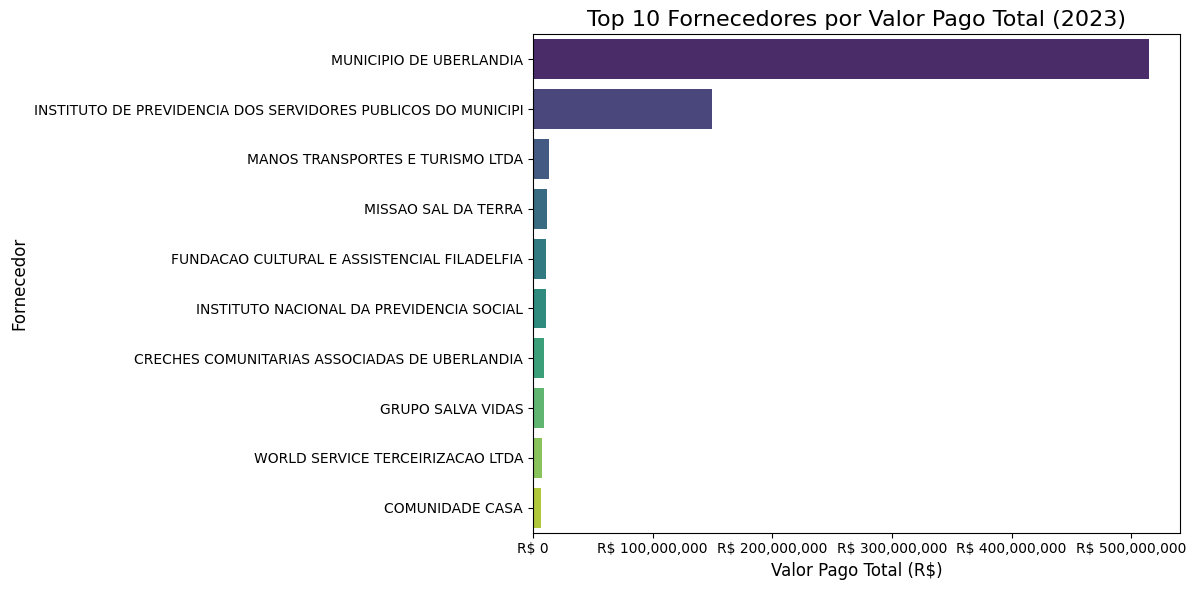

In [125]:
# podemos alterar se n = 10 ou outro
n = 10
top_fornecedores = df_educacao_trat.groupby('FORNECEDOR')['VALORPAGO'].sum().sort_values(ascending=False).head(n)

plt.figure(figsize=(12, 6))
sns.barplot(
    x = top_fornecedores.values,
    y = top_fornecedores.index,
    palette = "viridis"
    )
plt.title(f"Top {n} Fornecedores por Valor Pago Total (2023)", fontsize=16)
plt.xlabel("Valor Pago Total (R$)", fontsize=12)
plt.ylabel("Fornecedor", fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
plt.tight_layout()
plt.show()

In [126]:
df_educacao_trat[df_educacao_trat['FORNECEDOR'] == 'MUNICIPIO DE UBERLANDIA'].sort_values(by='VALORPAGO', ascending=False)

,ANOEMPENHO,DTLANCAMENTO,EMPENHO,FONTE,FORNECEDOR,FUNCIONALPROGRAMATICA,LICITACAO,NOMEORGAO,OBJETOSERVICO,SECRETARIA,VALORANULADO,VALOREMPENHADO,VALORLIQUIDADO,VALORPAGO,VALORRETORNADO,DATA_LANCAMENTO,HORA_LANCAMENTO,MES_LANCAMENTO,DIA_SEMANA,MES_NOME
11358,2023,2023-07-27,25664,1500000,MUNICIPIO DE UBERLANDIA,12 361 2001 999 2295 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",18758414.05,18758414.05,18758414.05,"R$ 0,0",2023-07-27,00:00:00,7,Quinta-feira,2023-07
4713,2023,2023-04-27,16227,1540000,MUNICIPIO DE UBERLANDIA,12 361 2001 999 2516 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",15880767.33,15880767.33,15880767.33,"R$ 0,0",2023-04-27,00:00:00,4,Quinta-feira,2023-04
6972,2023,2023-05-30,19598,1540000,MUNICIPIO DE UBERLANDIA,12 361 2001 999 2516 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",15842598.01,15842598.01,15842598.01,"R$ 0,0",2023-05-30,00:00:00,5,Terça-feira,2023-05
9263,2023,2023-06-29,22720,1540000,MUNICIPIO DE UBERLANDIA,12 361 2001 999 2516 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",15759577.76,15759577.76,15759577.76,"R$ 0,0",2023-06-29,00:00:00,6,Quinta-feira,2023-06
22686,2023,2023-12-20,44565,1500000,MUNICIPIO DE UBERLANDIA,12 361 2001 999 2295 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",15598998.93,15598998.93,15598998.93,"R$ 0,0",2023-12-20,00:00:00,12,Quarta-feira,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23482,2023,2023-01-27,4627,1500000,MUNICIPIO DE UBERLANDIA,12 122 2005 999 2302 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",59.82,59.82,59.82,"R$ 0,0",2023-01-27,00:00:00,1,Sexta-feira,2023-01
11348,2023,2023-07-27,25655,1500000,MUNICIPIO DE UBERLANDIA,12 122 2005 999 2302 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",59.82,59.82,59.82,"R$ 0,0",2023-07-27,00:00:00,7,Quinta-feira,2023-07
4725,2023,2023-04-27,16238,1540000,MUNICIPIO DE UBERLANDIA,12 365 2002 999 2525 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",59.82,59.82,59.82,"R$ 0,0",2023-04-27,00:00:00,4,Quinta-feira,2023-04
6967,2023,2023-05-30,19593,1500000,MUNICIPIO DE UBERLANDIA,12 122 2005 999 2302 319011,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",59.82,59.82,59.82,"R$ 0,0",2023-05-30,00:00:00,5,Terça-feira,2023-05


In [ ]:
# Existe algo de muito estrando com o fornecedor MUNICIPIO DE UBERLANDIA
# Gastei mais uma hora investigando e descobri que tem vários pagamentos altos para esse fornecedor
# Vamos separar o dataframe para investigar melhor

df_strange = df_educacao_trat[df_educacao_trat['FORNECEDOR'] == 'MUNICIPIO DE UBERLANDIA'] # Somente MUNICIPIO DE UBERLANDIA
df_not_strange = df_educacao_trat[df_educacao_trat['FORNECEDOR'] != 'MUNICIPIO DE UBERLANDIA']
df_not_strange

,ANOEMPENHO,DTLANCAMENTO,EMPENHO,FONTE,FORNECEDOR,FUNCIONALPROGRAMATICA,LICITACAO,NOMEORGAO,OBJETOSERVICO,SECRETARIA,VALORANULADO,VALOREMPENHADO,VALORLIQUIDADO,VALORPAGO,VALORRETORNADO,DATA_LANCAMENTO,HORA_LANCAMENTO,MES_LANCAMENTO,DIA_SEMANA,MES_NOME
0,2023,2023-01-16 00:00:00,1000,1500000,CECILIA RIBEIRO ROCHA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
1,2023,2023-02-28 10:03:18,10002,1552000,VASCONCELOS INDUSTRIA COMERCIO IMPORTACAO E EX...,12 361 2004 999 2076 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,BOLACHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",23500.00,23500.00,23500.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
2,2023,2023-02-28 10:03:18,10004,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 361 2001 999 2554 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",13430.00,13430.00,13430.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
3,2023,2023-02-28 10:03:18,10007,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 365 2002 999 2555 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",12640.00,12640.00,12640.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
8,2023,2023-01-16 00:00:00,1001,1500000,CLAUDIA LUCIA DE ANDRADE ALCANTARA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1734.92,1734.92,1734.92,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27502,2023,2023-02-28 10:03:18,9964,1552000,M.O.T.A. COMERCIAL LTDA - EPP,12 367 2004 999 2781 339030,549/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,OLEO DE SOJA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",21300.00,21300.00,21300.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
27509,2023,2023-01-16 00:00:00,997,1500000,SILVANIA VIEIRA GONCALVES CAMPOS,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
27517,2023,2023-01-16 00:00:00,998,1500000,SIMONE PEREIRA DE ARAUJO LIMA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
27526,2023,2023-01-16 00:00:00,999,1500000,YASMIN ROSA FERREIRA,12 361 2001 999 2295 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01


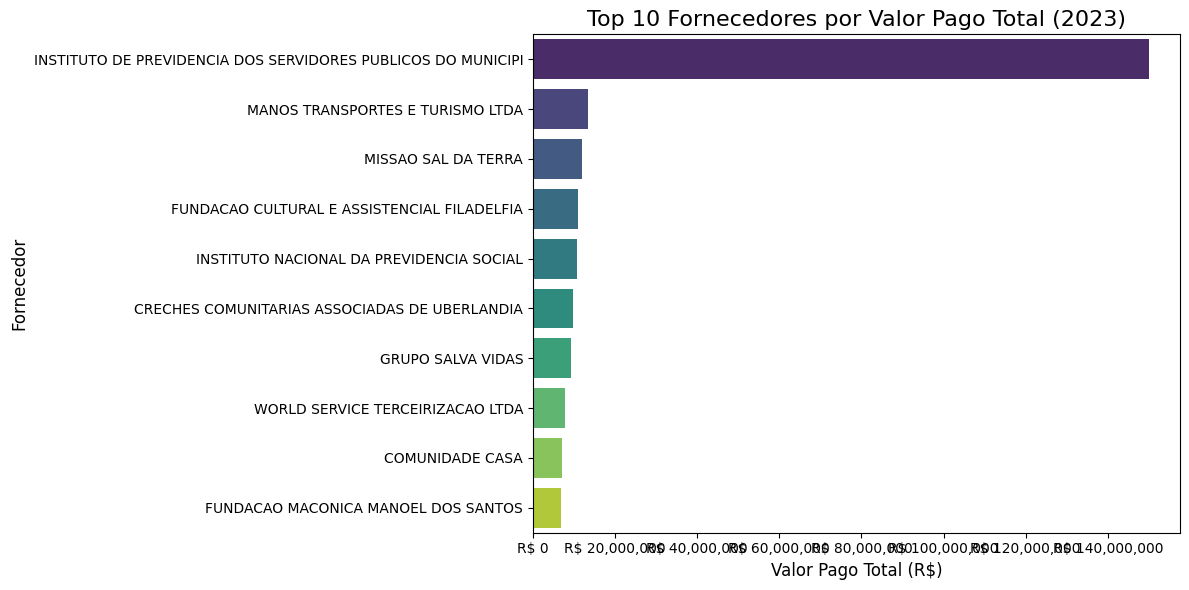

In [132]:
# podemos alterar se n = 10 ou outro
n = 10
top_fornecedores = df_not_strange.groupby('FORNECEDOR')['VALORPAGO'].sum().sort_values(ascending=False).head(n)

plt.figure(figsize=(12, 6))
sns.barplot(
    x = top_fornecedores.values,
    y = top_fornecedores.index,
    palette = "viridis"
    )
plt.title(f"Top {n} Fornecedores por Valor Pago Total (2023)", fontsize=16)
plt.xlabel("Valor Pago Total (R$)", fontsize=12)
plt.ylabel("Fornecedor", fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
plt.tight_layout()
plt.show()

In [135]:
# Vamos retirar também a previdencia e analisar separadamente
df_municipio = df_educacao_trat[df_educacao_trat['FORNECEDOR'] == 'MUNICIPIO DE UBERLANDIA']
df_previdencia = df_educacao_trat[df_educacao_trat['FORNECEDOR'] == 'INSTITUTO DE PREVIDENCIA DOS SERVIDORES PUBLICOS DO MUNICIPI']
df_restante = df_not_strange[df_not_strange['FORNECEDOR'] != 'INSTITUTO DE PREVIDENCIA DOS SERVIDORES PUBLICOS DO MUNICIPI']
df_restante

,ANOEMPENHO,DTLANCAMENTO,EMPENHO,FONTE,FORNECEDOR,FUNCIONALPROGRAMATICA,LICITACAO,NOMEORGAO,OBJETOSERVICO,SECRETARIA,VALORANULADO,VALOREMPENHADO,VALORLIQUIDADO,VALORPAGO,VALORRETORNADO,DATA_LANCAMENTO,HORA_LANCAMENTO,MES_LANCAMENTO,DIA_SEMANA,MES_NOME
0,2023,2023-01-16 00:00:00,1000,1500000,CECILIA RIBEIRO ROCHA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
1,2023,2023-02-28 10:03:18,10002,1552000,VASCONCELOS INDUSTRIA COMERCIO IMPORTACAO E EX...,12 361 2004 999 2076 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,BOLACHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",23500.00,23500.00,23500.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
2,2023,2023-02-28 10:03:18,10004,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 361 2001 999 2554 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",13430.00,13430.00,13430.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
3,2023,2023-02-28 10:03:18,10007,1500000,WELLINGTON DE SOUZA VASCONCELOS 04788493110,12 365 2002 999 2555 339030,545/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,LENTILHA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",12640.00,12640.00,12640.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
8,2023,2023-01-16 00:00:00,1001,1500000,CLAUDIA LUCIA DE ANDRADE ALCANTARA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1734.92,1734.92,1734.92,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27502,2023,2023-02-28 10:03:18,9964,1552000,M.O.T.A. COMERCIAL LTDA - EPP,12 367 2004 999 2781 339030,549/2022,PREFEITURA MUNICIPAL DE UBERLÂNDIA,OLEO DE SOJA,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",21300.00,21300.00,21300.00,"R$ 0,0",2023-02-28,10:03:18,2,Terça-feira,2023-02
27509,2023,2023-01-16 00:00:00,997,1500000,SILVANIA VIEIRA GONCALVES CAMPOS,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
27517,2023,2023-01-16 00:00:00,998,1500000,SIMONE PEREIRA DE ARAUJO LIMA,12 365 2002 999 2301 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01
27526,2023,2023-01-16 00:00:00,999,1500000,YASMIN ROSA FERREIRA,12 361 2001 999 2295 319092,NaN,PREFEITURA MUNICIPAL DE UBERLÂNDIA,NaN,SECRETARIA MUNICIPAL DE EDUCAÇÃO,"R$ 0,0",1346.66,1346.66,1346.66,"R$ 0,0",2023-01-16,00:00:00,1,Segunda-feira,2023-01


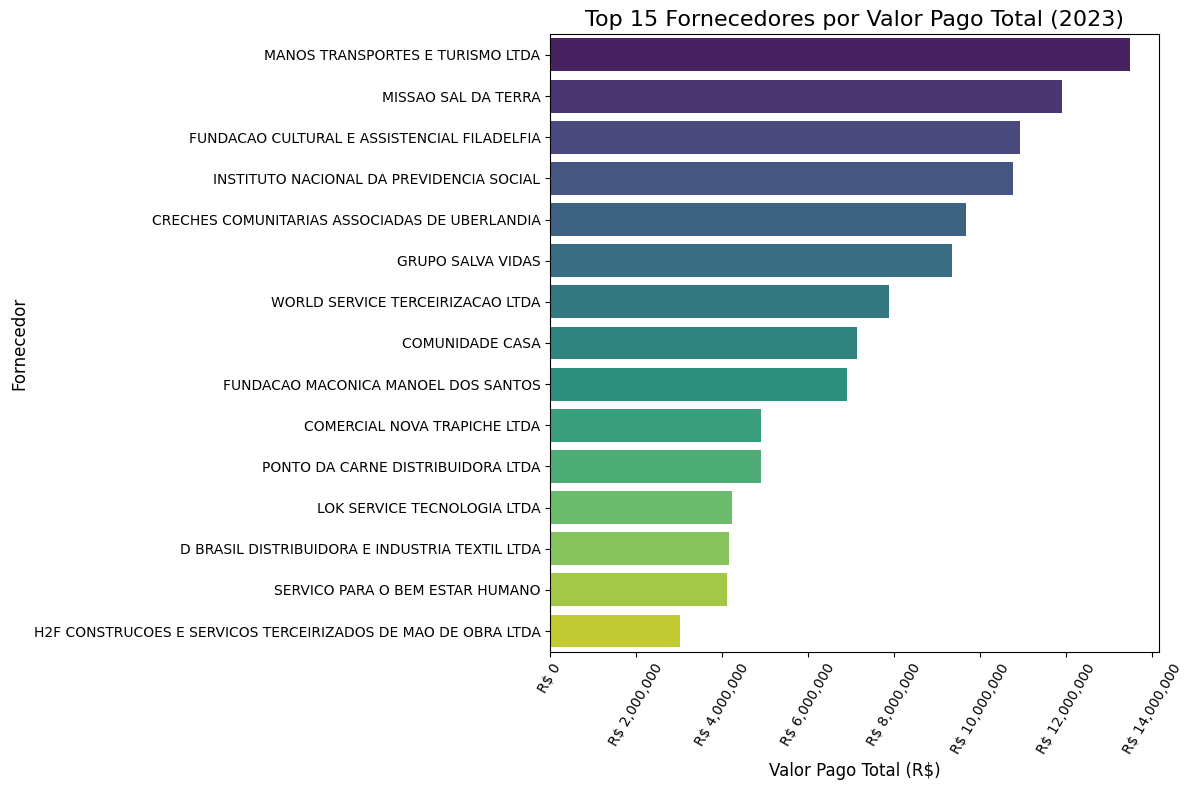

In [141]:
# podemos alterar se n = 10 ou outro
n = 15
top_fornecedores = df_restante.groupby('FORNECEDOR')['VALORPAGO'].sum().sort_values(ascending=False).head(n)

plt.figure(figsize=(12, 8))
sns.barplot(
    x = top_fornecedores.values,
    y = top_fornecedores.index,
    palette = "viridis"
    )
plt.title(f"Top {n} Fornecedores por Valor Pago Total (2023)", fontsize=16)
plt.xlabel("Valor Pago Total (R$)", fontsize=12)
plt.ylabel("Fornecedor", fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

# Analisar os gasto mensais

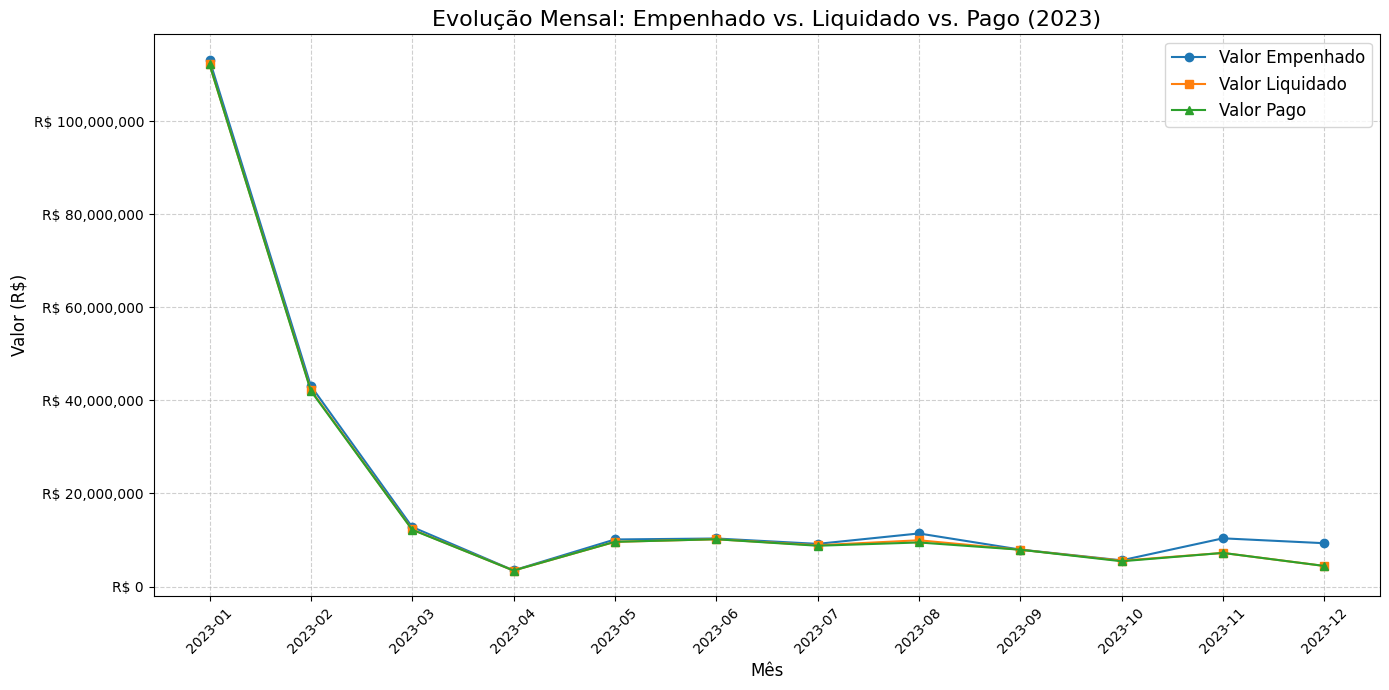

In [142]:
# Criando as 3 visualizações separadas
# Analisar os gasto mensais

# Inciar com o dataframe sem os fornecedores estranhos
gastos_mensais = df_restante.groupby('MES_NOME')[['VALOREMPENHADO', 'VALORLIQUIDADO', 'VALORPAGO']].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALOREMPENHADO'], label='Valor Empenhado', marker='o')
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALORLIQUIDADO'], label='Valor Liquidado', marker='s')
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALORPAGO'], label='Valor Pago', marker='^')

plt.title('Evolução Mensal: Empenhado vs. Liquidado vs. Pago (2023)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor (R$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout() 

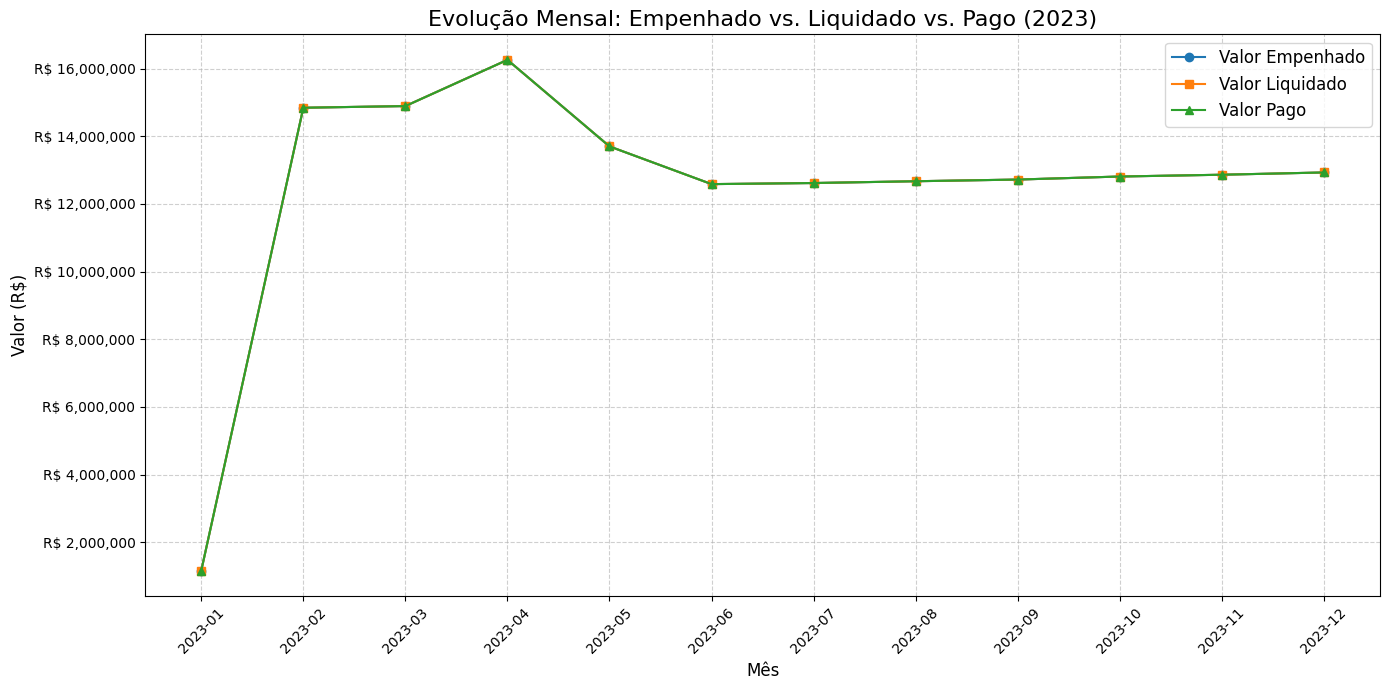

In [143]:
# Agora para os gasto com previdencia
gastos_mensais = df_previdencia.groupby('MES_NOME')[['VALOREMPENHADO', 'VALORLIQUIDADO', 'VALORPAGO']].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALOREMPENHADO'], label='Valor Empenhado', marker='o')
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALORLIQUIDADO'], label='Valor Liquidado', marker='s')
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALORPAGO'], label='Valor Pago', marker='^')

plt.title('Evolução Mensal: Empenhado vs. Liquidado vs. Pago (2023)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor (R$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout() 

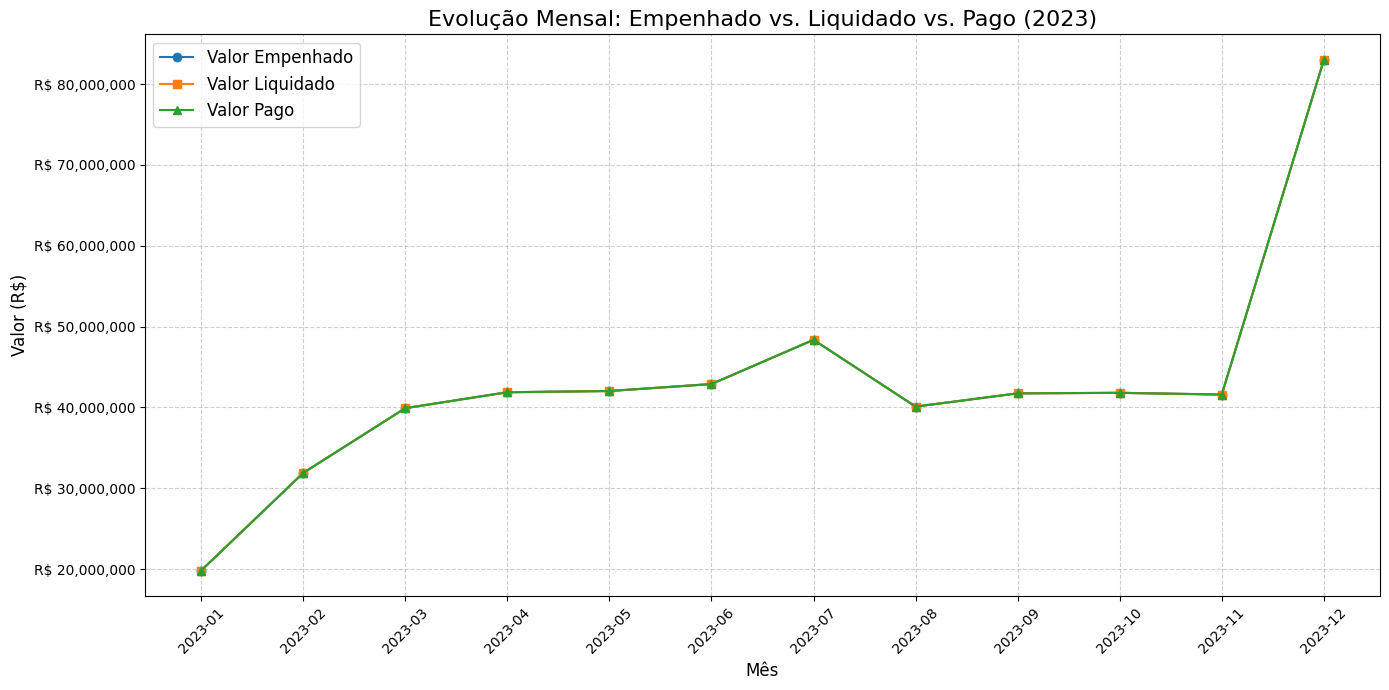

In [144]:
# Agora com gastos vinculados ao MUNICIPIO DE UBERLANDIA

# Inciar com o dataframe sem os fornecedores estranhos
gastos_mensais = df_municipio.groupby('MES_NOME')[['VALOREMPENHADO', 'VALORLIQUIDADO', 'VALORPAGO']].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALOREMPENHADO'], label='Valor Empenhado', marker='o')
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALORLIQUIDADO'], label='Valor Liquidado', marker='s')
plt.plot(gastos_mensais['MES_NOME'], gastos_mensais['VALORPAGO'], label='Valor Pago', marker='^')

plt.title('Evolução Mensal: Empenhado vs. Liquidado vs. Pago (2023)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor (R$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout() 

### Analisando ou buscando padrões de Lançamento

In [148]:
df_restante['HORA_LANCAMENTO']

0        00:00:00
1        10:03:18
2        10:03:18
3        10:03:18
8        00:00:00
           ...   
27502    10:03:18
27509    00:00:00
27517    00:00:00
27526    00:00:00
27528    10:03:18
Name: HORA_LANCAMENTO, Length: 8121, dtype: object

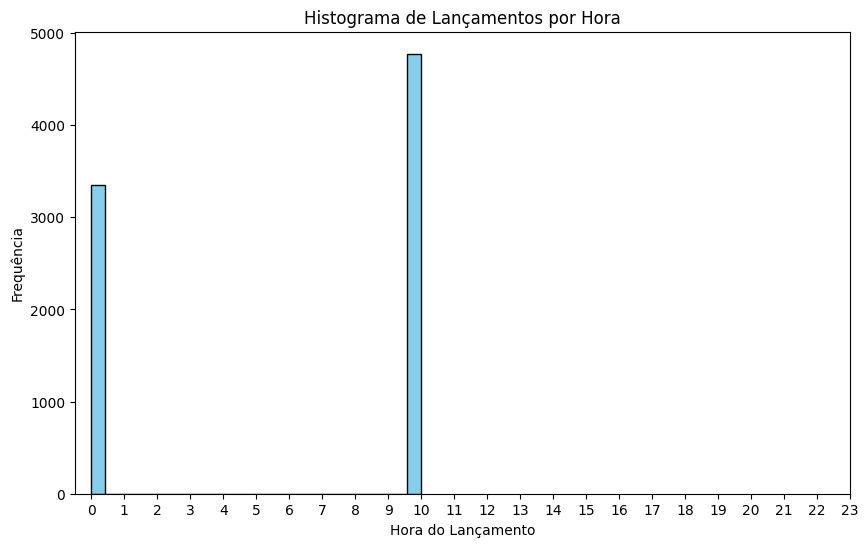

In [153]:
# Vamos seguir analisando os 3 dataframes separadamente

df_restante['HORA_LANCAMENTO_INT'] = df_restante['HORA_LANCAMENTO'].apply(lambda x: x.hour)

# Contagem por Hora do Lançamento -> Analisando df_restante
plt.figure(figsize=(10, 6))
plt.hist(df_restante['HORA_LANCAMENTO_INT'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hora do Lançamento')
plt.ylabel('Frequência')
plt.title('Histograma de Lançamentos por Hora')
plt.xticks(range(0, 24))  # mostra cada hora
plt.show()

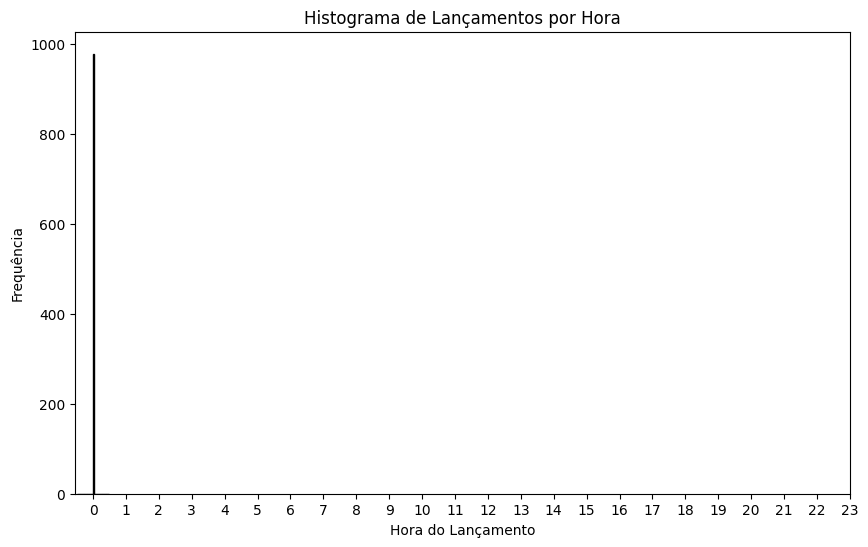

In [155]:
df_municipio['HORA_LANCAMENTO_INT'] = df_municipio['HORA_LANCAMENTO'].apply(lambda x: x.hour)

# Contagem por Hora do Lançamento -> Analisando df_municipio
plt.figure(figsize=(10, 6))
plt.hist(df_municipio['HORA_LANCAMENTO_INT'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hora do Lançamento')
plt.ylabel('Frequência')
plt.title('Histograma de Lançamentos por Hora')
plt.xticks(range(0, 24))  # mostra cada hora
plt.show()

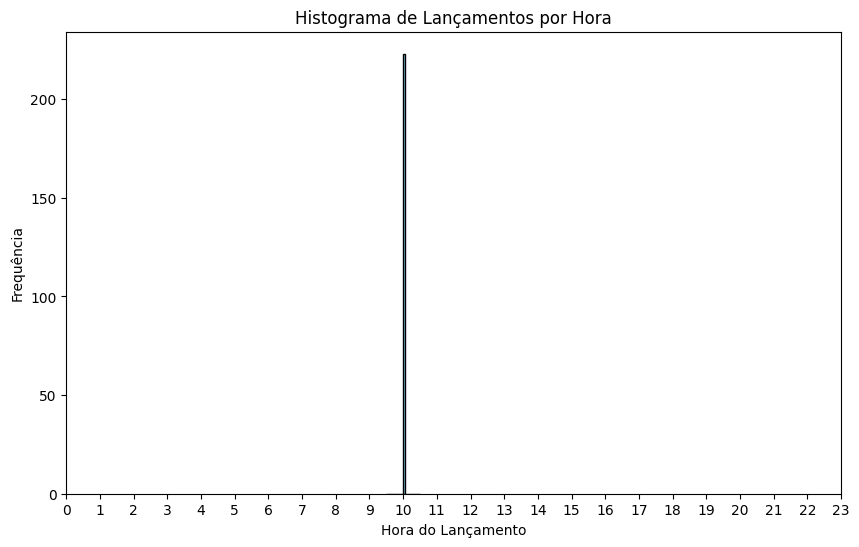

In [156]:
df_previdencia['HORA_LANCAMENTO_INT'] = df_previdencia['HORA_LANCAMENTO'].apply(lambda x: x.hour)

# Contagem por Hora do Lançamento -> Analisando df_municipio
plt.figure(figsize=(10, 6))
plt.hist(df_previdencia['HORA_LANCAMENTO_INT'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hora do Lançamento')
plt.ylabel('Frequência')
plt.title('Histograma de Lançamentos por Hora')
plt.xticks(range(0, 24))  # mostra cada hora
plt.show()

### Agora vamos verificar ao longo dos dias da semana, padrões da lançamento e de valor gasto

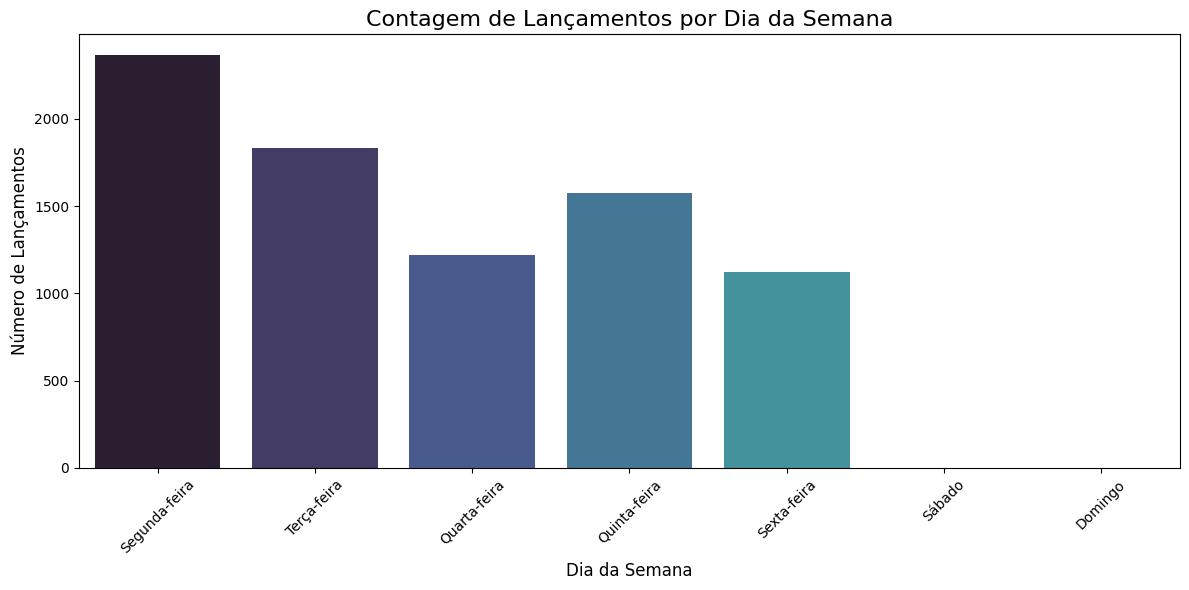

In [ ]:
# df_restante 

dias_ordem = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

plt.figure(figsize=(12, 6))
sns.countplot(
    x='DIA_SEMANA',
    data=df_restante,
    order=dias_ordem,
    palette='mako'
)
plt.title('Contagem de Lançamentos por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Número de Lançamentos', fontsize=12)
plt.xticks(ticks=range(7), labels=dias_ordem, rotation=45)
plt.tight_layout()

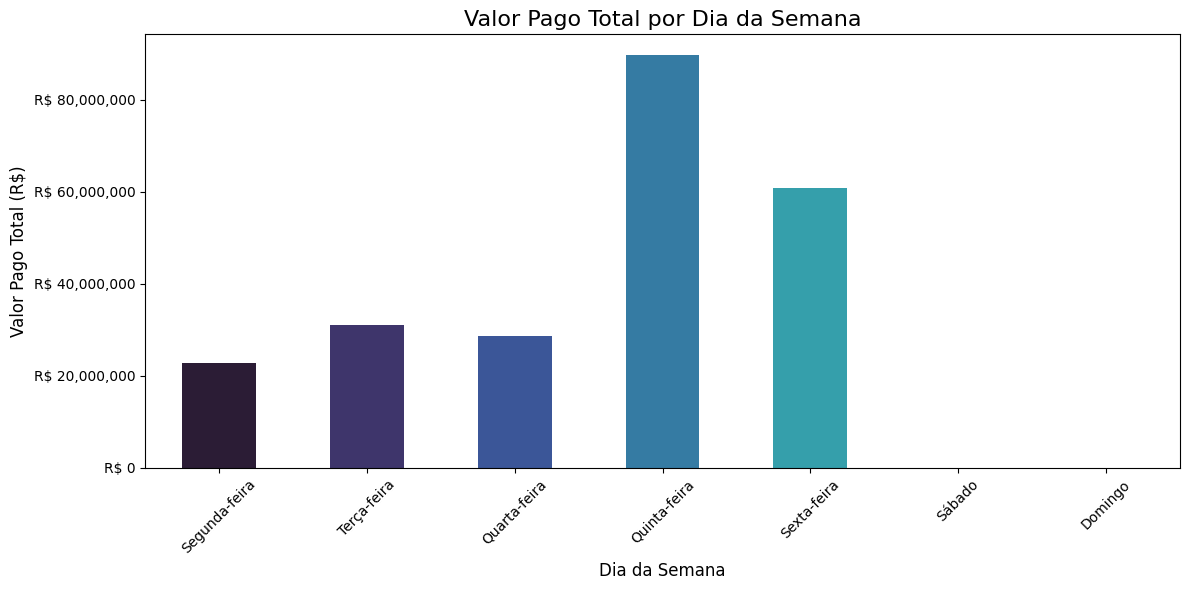

In [166]:
# Analise de gasto por dia da semana - df_restante

valor_dia_semana = df_restante.groupby('DIA_SEMANA')['VALORPAGO'].sum().reindex(dias_ordem)

plt.figure(figsize=(12, 6))
valor_dia_semana.plot(kind='bar', color=sns.color_palette('mako', 7))
plt.title('Valor Pago Total por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Valor Pago Total (R$)', fontsize=12)
plt.xticks(ticks=range(7), labels=dias_ordem, rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
plt.tight_layout()

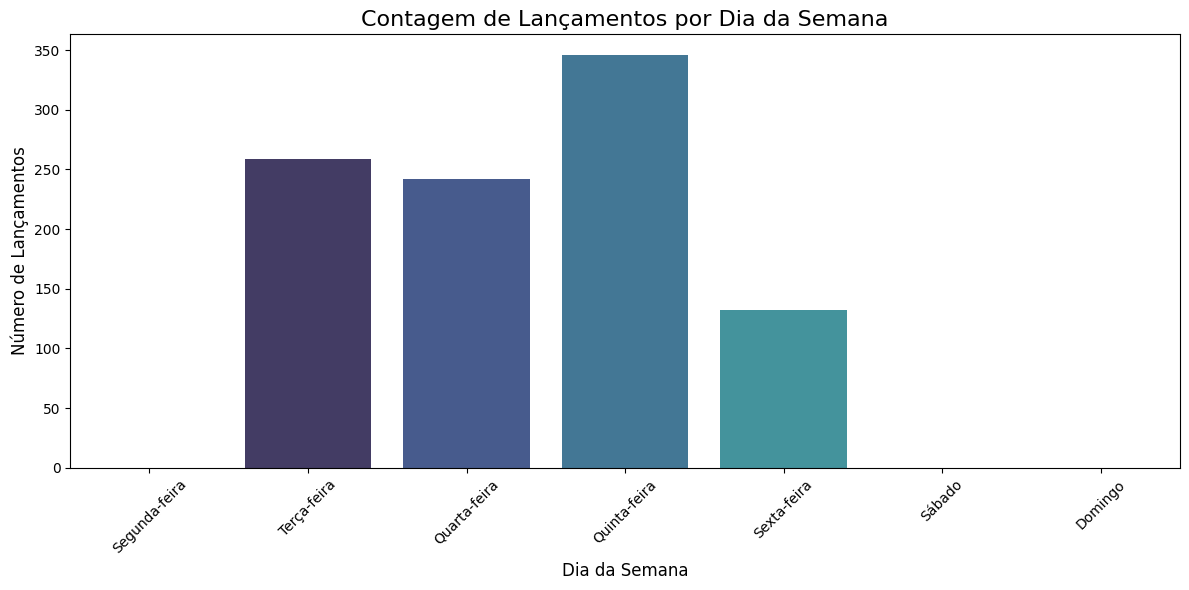

In [163]:
# df_municipio

plt.figure(figsize=(12, 6))
sns.countplot(
    x='DIA_SEMANA',
    data=df_municipio,
    order=dias_ordem,
    palette='mako'
)
plt.title('Contagem de Lançamentos por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Número de Lançamentos', fontsize=12)
plt.xticks(ticks=range(7), labels=dias_ordem, rotation=45)
plt.tight_layout()

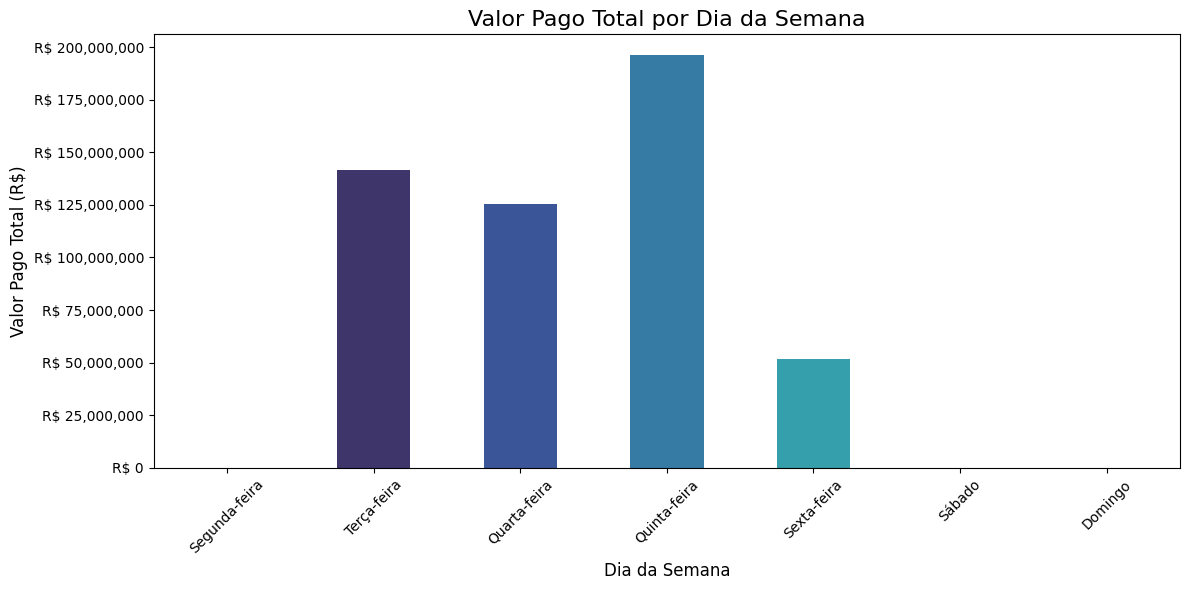

In [167]:
# Analise de gasto por dia da semana - df_municipio

valor_dia_semana = df_municipio.groupby('DIA_SEMANA')['VALORPAGO'].sum().reindex(dias_ordem)

plt.figure(figsize=(12, 6))
valor_dia_semana.plot(kind='bar', color=sns.color_palette('mako', 7))
plt.title('Valor Pago Total por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Valor Pago Total (R$)', fontsize=12)
plt.xticks(ticks=range(7), labels=dias_ordem, rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
plt.tight_layout()

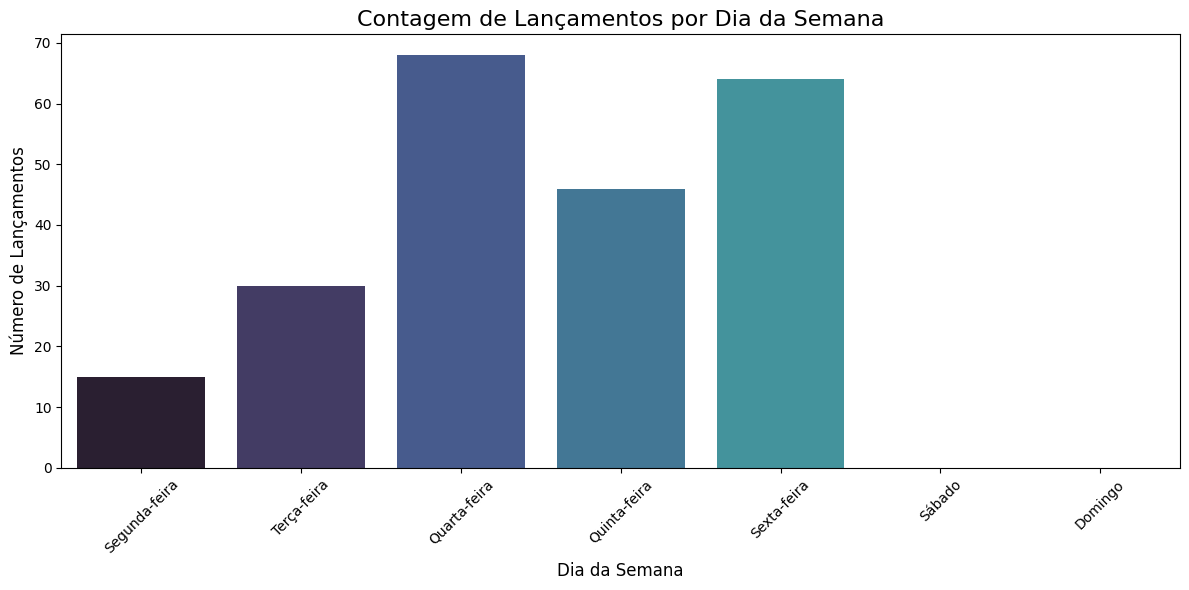

In [164]:
# df_previdencia

plt.figure(figsize=(12, 6))
sns.countplot(
    x='DIA_SEMANA',
    data=df_previdencia,
    order=dias_ordem,
    palette='mako'
)
plt.title('Contagem de Lançamentos por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Número de Lançamentos', fontsize=12)
plt.xticks(ticks=range(7), labels=dias_ordem, rotation=45)
plt.tight_layout()

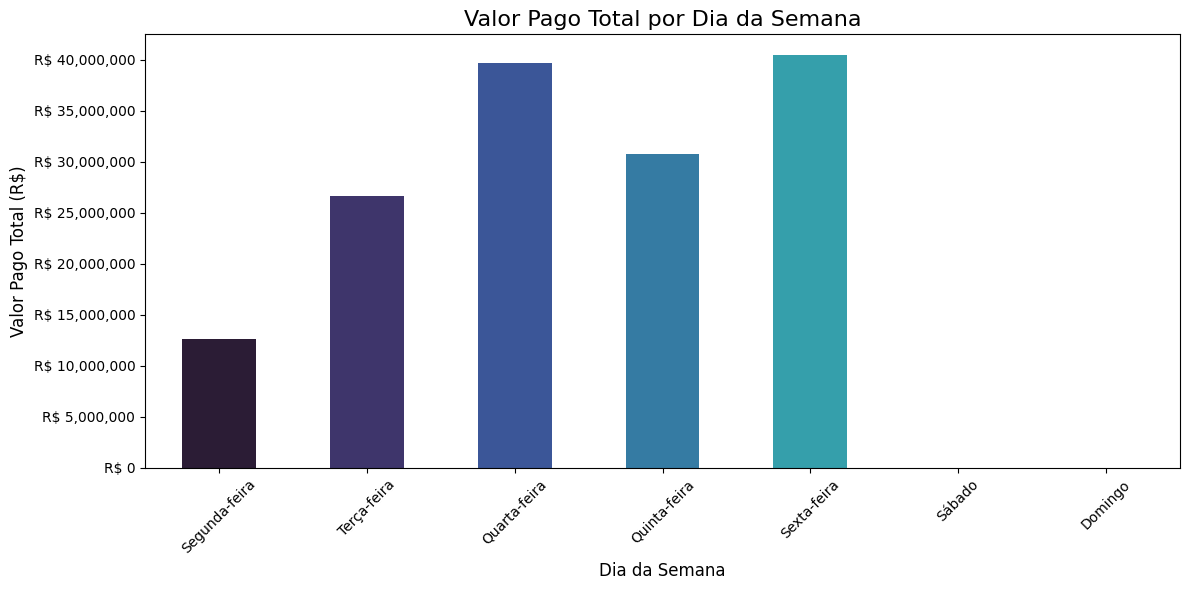

In [168]:
# Analise de gasto por dia da semana - df_previdencia

valor_dia_semana = df_previdencia.groupby('DIA_SEMANA')['VALORPAGO'].sum().reindex(dias_ordem)

plt.figure(figsize=(12, 6))
valor_dia_semana.plot(kind='bar', color=sns.color_palette('mako', 7))
plt.title('Valor Pago Total por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Valor Pago Total (R$)', fontsize=12)
plt.xticks(ticks=range(7), labels=dias_ordem, rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
plt.tight_layout()

### Analisando os dados faltantes e tentando entender

#### df_restante

In [179]:
df_sem_licitacao = df_restante[df_restante['LICITACAO'].isnull()]
df_com_licitacao = df_restante[df_restante['LICITACAO'].notnull()]

total_pago = df_restante['VALORPAGO'].sum()
total_pago_sem_licitacao = df_sem_licitacao['VALORPAGO'].sum()
perc_valor_sem_licitacao = (total_pago_sem_licitacao / total_pago) * 100
perc_contagem_sem_licitacao = (len(df_sem_licitacao) / len(df_restante)) * 100

print("\n--- Análise de Licitação ---")
print(f"Total de Lançamentos: {len(df_restante)}")
print(f"Lançamentos SEM Licitação: {len(df_sem_licitacao)} ({perc_contagem_sem_licitacao:.2f}%)")
print(f"Lançamentos COM Licitação: {len(df_com_licitacao)}")
print("-" * 30)
print(f"Valor Pago Total: R$ {total_pago:,.2f}")
print(f"Valor Pago SEM Licitação: R$ {total_pago_sem_licitacao:,.2f} ({perc_valor_sem_licitacao:.2f}%)")
print(f"Valor Pago COM Licitação: R$ {df_com_licitacao['VALORPAGO'].sum():,.2f}")


--- Análise de Licitação ---
Total de Lançamentos: 8121
Lançamentos SEM Licitação: 3379 (41.61%)
Lançamentos COM Licitação: 4742
------------------------------
Valor Pago Total: R$ 232,836,994.91
Valor Pago SEM Licitação: R$ 16,930,815.17 (7.27%)
Valor Pago COM Licitação: R$ 215,906,179.74


In [173]:
n_for = 10
top_fornecedores_sem_licitacao = df_sem_licitacao.groupby('FORNECEDOR')['VALORPAGO'].sum().sort_values(ascending=False).head(10)

print("\nTop 5 Fornecedores com pagamentos SEM licitação:")
print(top_fornecedores_sem_licitacao)


Top 5 Fornecedores com pagamentos SEM licitação:
FORNECEDOR
SILESIA VERSIANI MAGALHAES                  282975.19
ELAINE CRISTINA FONSECA                     192782.73
EUCANIA FERREIRA DA SILVA                   187115.01
MARIA DO SOCORRO FALCAO DE GOIS             181219.77
LUZINETE CARRIJO OLIVEIRA                   165933.85
ANDRE LUIS MIGUEL                           160251.99
RAQUEL MAGNOLIA FERREIRA RANZATTI           146650.24
MARIA CRISTINA SANTOS DE OLIVEIRA ALVES     136659.33
KEILA APARECIDA RABELO FELIZARDO            123472.37
SILVONE PEIXOTO SOUSA                       119289.10
Name: VALORPAGO, dtype: float64


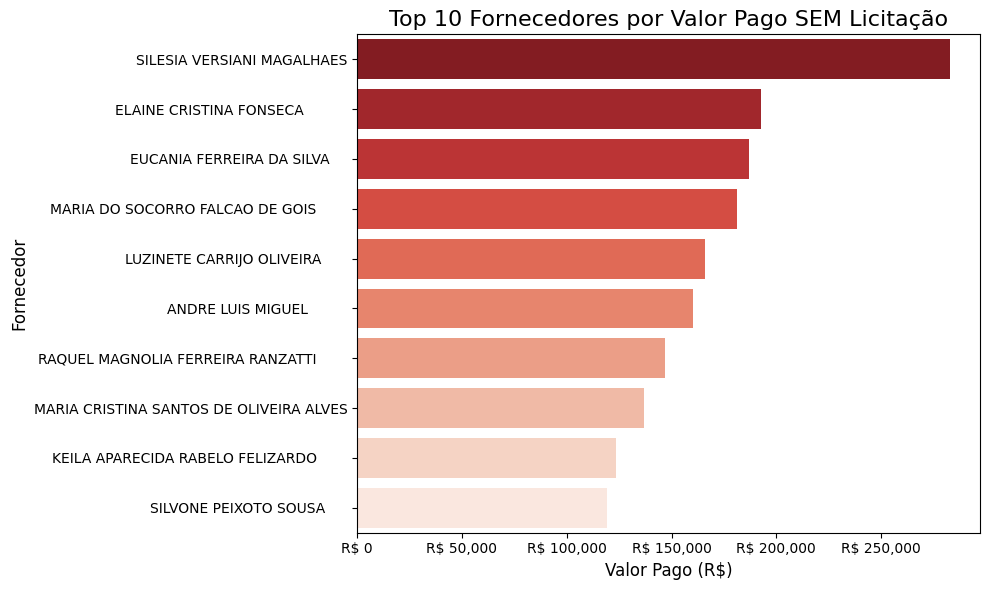

In [174]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_fornecedores_sem_licitacao.values,
    y=top_fornecedores_sem_licitacao.index,
    palette='Reds_r'
)
plt.title(f"Top {n_for} Fornecedores por Valor Pago SEM Licitação", fontsize=16)
plt.xlabel('Valor Pago (R$)', fontsize=12)
plt.ylabel('Fornecedor', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
plt.tight_layout()

#### Verificação para df_municipio

In [178]:
df_sem_licitacao = df_municipio[df_municipio['LICITACAO'].isnull()]
df_com_licitacao = df_municipio[df_municipio['LICITACAO'].notnull()]

total_pago = df_municipio['VALORPAGO'].sum()
total_pago_sem_licitacao = df_sem_licitacao['VALORPAGO'].sum()
perc_valor_sem_licitacao = (total_pago_sem_licitacao / total_pago) * 100
perc_contagem_sem_licitacao = (len(df_sem_licitacao) / len(df_municipio)) * 100

print("\n--- Análise de Licitação ---")
print(f"Total de Lançamentos: {len(df_municipio)}")
print(f"Lançamentos SEM Licitação: {len(df_sem_licitacao)} ({perc_contagem_sem_licitacao:.2f}%)")
print(f"Lançamentos COM Licitação: {len(df_com_licitacao)}")
print("-" * 30)
print(f"Valor Pago Total: R$ {total_pago:,.2f}")
print(f"Valor Pago SEM Licitação: R$ {total_pago_sem_licitacao:,.2f} ({perc_valor_sem_licitacao:.2f}%)")
print(f"Valor Pago COM Licitação: R$ {df_com_licitacao['VALORPAGO'].sum():,.2f}")


--- Análise de Licitação ---
Total de Lançamentos: 979
Lançamentos SEM Licitação: 979 (100.00%)
Lançamentos COM Licitação: 0
------------------------------
Valor Pago Total: R$ 514,978,825.86
Valor Pago SEM Licitação: R$ 514,978,825.86 (100.00%)
Valor Pago COM Licitação: R$ 0.00


#### Analise para df_previdencia

In [180]:
df_sem_licitacao = df_previdencia[df_previdencia['LICITACAO'].isnull()]
df_com_licitacao = df_previdencia[df_previdencia['LICITACAO'].notnull()]

total_pago = df_municipio['VALORPAGO'].sum()
total_pago_sem_licitacao = df_sem_licitacao['VALORPAGO'].sum()
perc_valor_sem_licitacao = (total_pago_sem_licitacao / total_pago) * 100
perc_contagem_sem_licitacao = (len(df_sem_licitacao) / len(df_previdencia)) * 100

print("\n--- Análise de Licitação ---")
print(f"Total de Lançamentos: {len(df_previdencia)}")
print(f"Lançamentos SEM Licitação: {len(df_sem_licitacao)} ({perc_contagem_sem_licitacao:.2f}%)")
print(f"Lançamentos COM Licitação: {len(df_com_licitacao)}")
print("-" * 30)
print(f"Valor Pago Total: R$ {total_pago:,.2f}")
print(f"Valor Pago SEM Licitação: R$ {total_pago_sem_licitacao:,.2f} ({perc_valor_sem_licitacao:.2f}%)")
print(f"Valor Pago COM Licitação: R$ {df_com_licitacao['VALORPAGO'].sum():,.2f}")


--- Análise de Licitação ---
Total de Lançamentos: 223
Lançamentos SEM Licitação: 4 (1.79%)
Lançamentos COM Licitação: 219
------------------------------
Valor Pago Total: R$ 514,978,825.86
Valor Pago SEM Licitação: R$ 0.00 (0.00%)
Valor Pago COM Licitação: R$ 150,064,666.01


### Analisando os dados faltantes em OBJETOSERVICO

#### df_restante

In [181]:
df_sem_objeto = df_restante[df_restante['OBJETOSERVICO'].isnull()]
total_pago_sem_objeto = df_sem_objeto['VALORPAGO'].sum()
perc_valor_sem_objeto = (total_pago_sem_objeto / total_pago) * 100
perc_contagem_sem_objeto = (len(df_sem_objeto) / len(df_restante)) * 100

print("\n--- Análise de Objeto/Serviço ---")
print(f"Lançamentos SEM Objeto: {len(df_sem_objeto)} ({perc_contagem_sem_objeto:.2f}%)")
print(f"Valor Pago SEM Objeto: R$ {total_pago_sem_objeto:,.2f} ({perc_valor_sem_objeto:.2f}%)")


--- Análise de Objeto/Serviço ---
Lançamentos SEM Objeto: 3348 (41.23%)
Valor Pago SEM Objeto: R$ 16,930,815.17 (3.29%)


#### df_municipio

In [182]:
df_sem_objeto = df_municipio[df_municipio['OBJETOSERVICO'].isnull()]
total_pago_sem_objeto = df_sem_objeto['VALORPAGO'].sum()
perc_valor_sem_objeto = (total_pago_sem_objeto / total_pago) * 100
perc_contagem_sem_objeto = (len(df_sem_objeto) / len(df_municipio)) * 100

print("\n--- Análise de Objeto/Serviço ---")
print(f"Lançamentos SEM Objeto: {len(df_sem_objeto)} ({perc_contagem_sem_objeto:.2f}%)")
print(f"Valor Pago SEM Objeto: R$ {total_pago_sem_objeto:,.2f} ({perc_valor_sem_objeto:.2f}%)")


--- Análise de Objeto/Serviço ---
Lançamentos SEM Objeto: 979 (100.00%)
Valor Pago SEM Objeto: R$ 514,978,825.86 (100.00%)


#### df_previdencia

In [183]:
df_sem_objeto = df_previdencia[df_previdencia['OBJETOSERVICO'].isnull()]
total_pago_sem_objeto = df_sem_objeto['VALORPAGO'].sum()
perc_valor_sem_objeto = (total_pago_sem_objeto / total_pago) * 100
perc_contagem_sem_objeto = (len(df_sem_objeto) / len(df_previdencia)) * 100

print("\n--- Análise de Objeto/Serviço ---")
print(f"Lançamentos SEM Objeto: {len(df_sem_objeto)} ({perc_contagem_sem_objeto:.2f}%)")
print(f"Valor Pago SEM Objeto: R$ {total_pago_sem_objeto:,.2f} ({perc_valor_sem_objeto:.2f}%)")


--- Análise de Objeto/Serviço ---
Lançamentos SEM Objeto: 0 (0.00%)
Valor Pago SEM Objeto: R$ 0.00 (0.00%)
